In [1]:
#import numpy as np
import xarray as xr
import cartopy as cr
import numpy as np
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot as plt

In [2]:
Gate= pd.read_csv('datalog.csv',names=['Datetime','Temperature','Humidity','Pressure','Altitude','CO','CO$_2$','NH$_3$','PM$_{1}$','PM$_{2.5}$','PM$_{10}$'], delimiter= ',' ,skiprows= 8838)

In [3]:
Gate

,Datetime,Temperature,Humidity,Pressure,Altitude,CO,CO$_2$,NH$_3$,PM$_{1}$,PM$_{2.5}$,PM$_{10}$
0,2023-7-20 6:21:19,25.06,83.29,98616.45,227.99,3.93,402.84,4.32,18.0,22.0,23.0
1,2023-7-20 6:21:19,25.07,83.26,98616.44,227.99,4.34,403.05,4.59,19.0,22.0,23.0
2,2023-7-20 6:21:20,25.06,83.28,98616.22,228.01,6.57,404.12,5.96,20.0,24.0,24.0
3,2023-7-20 6:21:22,25.05,83.28,98616.38,227.99,3.98,402.87,4.36,21.0,25.0,27.0
4,2023-7-20 6:21:32,25.03,83.29,98617.30,227.91,6.29,403.99,5.80,25.0,38.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...
4536,2023-7-20 18:19:6,29.40,72.36,98379.98,248.13,2.34,401.95,3.12,177.0,304.0,333.0
4537,2023-7-20 18:19:15,29.40,72.32,98382.12,247.95,4.59,403.18,4.76,181.0,311.0,331.0
4538,2023-7-20 18:19:24,29.39,72.23,98381.41,248.01,5.53,403.64,5.35,210.0,377.0,406.0
4539,2023-7-20 18:19:34,29.42,72.11,98382.33,247.93,2.68,402.15,3.39,194.0,335.0,356.0


In [4]:
Gate['Hours']= pd.to_datetime(Gate.Datetime)
Gate=Gate.groupby(Gate.Hours.map(lambda t: t.hour)).mean()
hours=[str(i)+" "+"hr" for i in range(1, len(Gate)+1,1)]

In [5]:
Gate.insert(1,'hours',hours)

In [6]:
Gate

,Temperature,hours,Humidity,Pressure,Altitude,CO,CO$_2$,NH$_3$,PM$_{1}$,PM$_{2.5}$,PM$_{10}$
Hours,,,,,,,,,,,
6,24.831129,1 hr,85.532258,98629.703347,226.858185,3.436250,402.557298,3.938508,33.592742,48.040323,49.625000
7,26.656958,2 hr,78.437884,98669.938095,223.434841,3.091217,402.366720,3.683254,41.806878,60.841270,63.060847
8,31.025778,3 hr,63.212823,98656.832507,224.550185,3.138734,402.367203,3.671478,35.348285,50.453826,51.992084
9,31.285594,4 hr,61.468654,98641.732955,225.834301,2.142929,401.805989,2.912005,31.585752,45.620053,47.052770
10,31.914855,5 hr,58.714828,98623.308285,227.402243,2.084934,401.769683,2.861240,27.691293,38.899736,40.002639
11,32.249156,6 hr,57.487388,98571.687203,231.796069,1.950976,401.687467,2.746306,21.451187,30.174142,31.171504
12,33.003404,7 hr,54.656807,98509.668391,237.077889,1.923483,401.670739,2.723219,18.759894,26.469657,27.366755
13,33.579789,8 hr,51.915989,98410.764248,245.505383,2.192032,401.829578,2.941741,23.197889,30.638522,31.411609
14,34.226306,9 hr,51.672058,98349.387441,250.738918,2.409710,401.958153,3.119077,21.358839,29.469657,30.453826


In [7]:
Gatte=Gate.set_index(['hours'])

In [8]:
A_gate=(Gatte[['CO','CO$_2$','NH$_3$','PM$_{1}$','PM$_{2.5}$','PM$_{10}$']])
A_gate

,CO,CO$_2$,NH$_3$,PM$_{1}$,PM$_{2.5}$,PM$_{10}$
hours,,,,,,
1 hr,3.436250,402.557298,3.938508,33.592742,48.040323,49.625000
2 hr,3.091217,402.366720,3.683254,41.806878,60.841270,63.060847
3 hr,3.138734,402.367203,3.671478,35.348285,50.453826,51.992084
4 hr,2.142929,401.805989,2.912005,31.585752,45.620053,47.052770
5 hr,2.084934,401.769683,2.861240,27.691293,38.899736,40.002639
6 hr,1.950976,401.687467,2.746306,21.451187,30.174142,31.171504
7 hr,1.923483,401.670739,2.723219,18.759894,26.469657,27.366755
8 hr,2.192032,401.829578,2.941741,23.197889,30.638522,31.411609
9 hr,2.409710,401.958153,3.119077,21.358839,29.469657,30.453826


<AxesSubplot:xlabel='hours'>

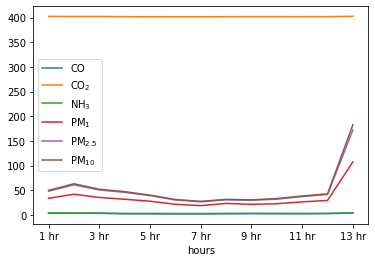

In [9]:
A_gate.plot()

Text(0, 0.5, 'PM$_{10}$')

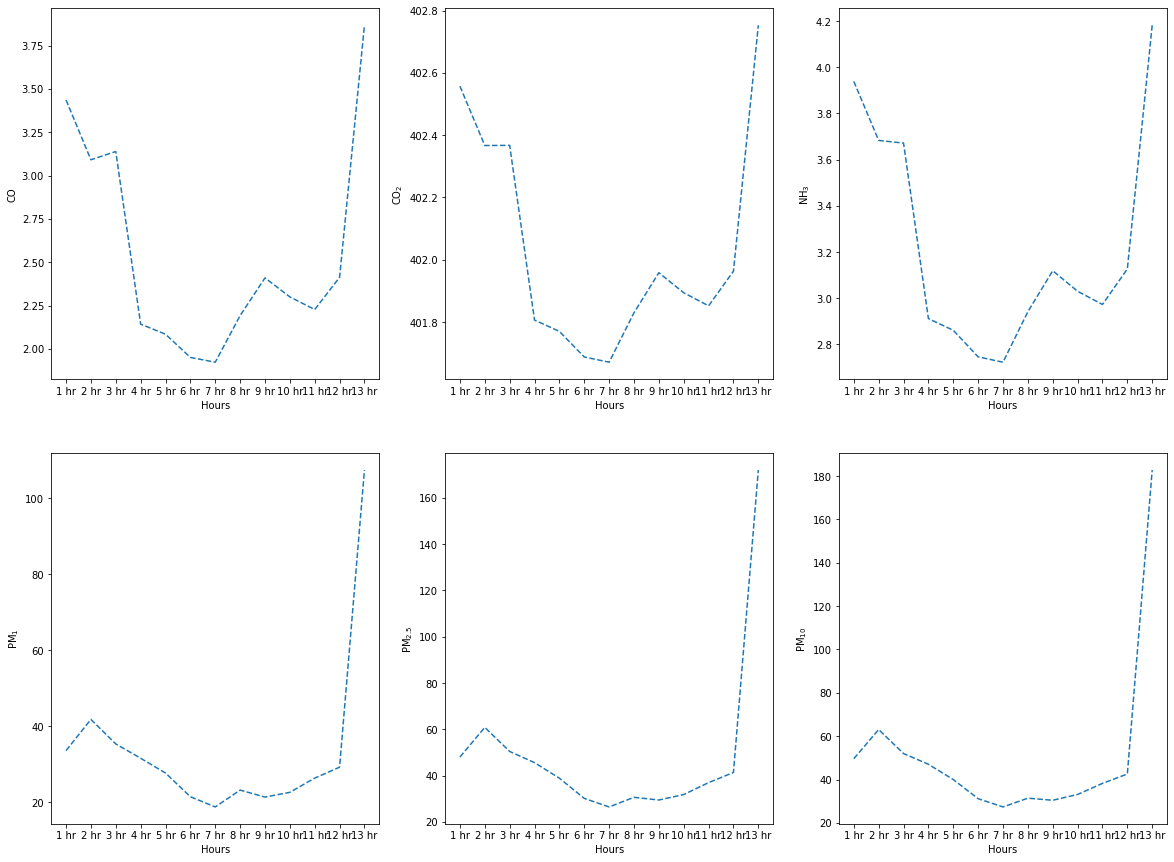

In [10]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(20,15))

# fig, axes= plt.subplots(ncols=3, nrows=2)

#columns=list(desmond.columns)

axes[0,0].plot(A_gate.index,A_gate.CO, ls='--')
axes[0,0].set_xlabel('Hours')
axes[0,0].set_ylabel(A_gate.columns[0])
    
axes[0,1].plot(A_gate.index,A_gate['CO$_2$'], ls='--')
axes[0,1].set_xlabel('Hours')
axes[0,1].set_ylabel(A_gate.columns[1])

axes[0,2].plot(A_gate.index,A_gate['NH$_3$'], ls='--')
axes[0,2].set_xlabel('Hours')
axes[0,2].set_ylabel(A_gate.columns[2])

axes[1,0].plot(A_gate.index,A_gate['PM$_{1}$'], ls='--')
axes[1,0].set_xlabel('Hours')
axes[1,0].set_ylabel(A_gate.columns[3])

axes[1,1].plot(A_gate.index,A_gate['PM$_{2.5}$'], ls='--')
axes[1,1].set_xlabel('Hours')
axes[1,1].set_ylabel(A_gate.columns[4])

axes[1,2].plot(A_gate.index,A_gate['PM$_{10}$'], ls='--')
axes[1,2].set_xlabel('Hours')
axes[1,2].set_ylabel(A_gate.columns[5])

In [11]:
hrs= ('6:00','7:00','8:00','9:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00','18:00')

In [12]:
A_gate.insert(1,'Hourss',hrs)

In [13]:
A_gate

,CO,Hourss,CO$_2$,NH$_3$,PM$_{1}$,PM$_{2.5}$,PM$_{10}$
hours,,,,,,,
1 hr,3.436250,6:00,402.557298,3.938508,33.592742,48.040323,49.625000
2 hr,3.091217,7:00,402.366720,3.683254,41.806878,60.841270,63.060847
3 hr,3.138734,8:00,402.367203,3.671478,35.348285,50.453826,51.992084
4 hr,2.142929,9:00,401.805989,2.912005,31.585752,45.620053,47.052770
5 hr,2.084934,10:00,401.769683,2.861240,27.691293,38.899736,40.002639
6 hr,1.950976,11:00,401.687467,2.746306,21.451187,30.174142,31.171504
7 hr,1.923483,12:00,401.670739,2.723219,18.759894,26.469657,27.366755
8 hr,2.192032,13:00,401.829578,2.941741,23.197889,30.638522,31.411609
9 hr,2.409710,14:00,401.958153,3.119077,21.358839,29.469657,30.453826


Text(0, 0.5, 'Pollution levels [$\\mu g/m^3$ ]')

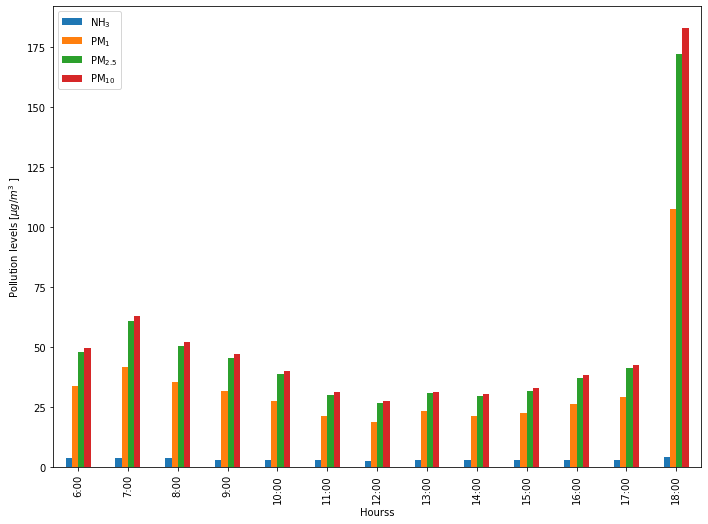

In [14]:
fig=plt.figure(figsize=(10,8))

A_gate.plot(x='Hourss', y=['NH$_3$','PM$_{1}$','PM$_{2.5}$','PM$_{10}$'],kind='bar', stacked=False ,ax = fig.add_axes([0,0,0.9,0.8]))
plt.ylabel('Pollution levels [$\mu g/m^3$ ]')

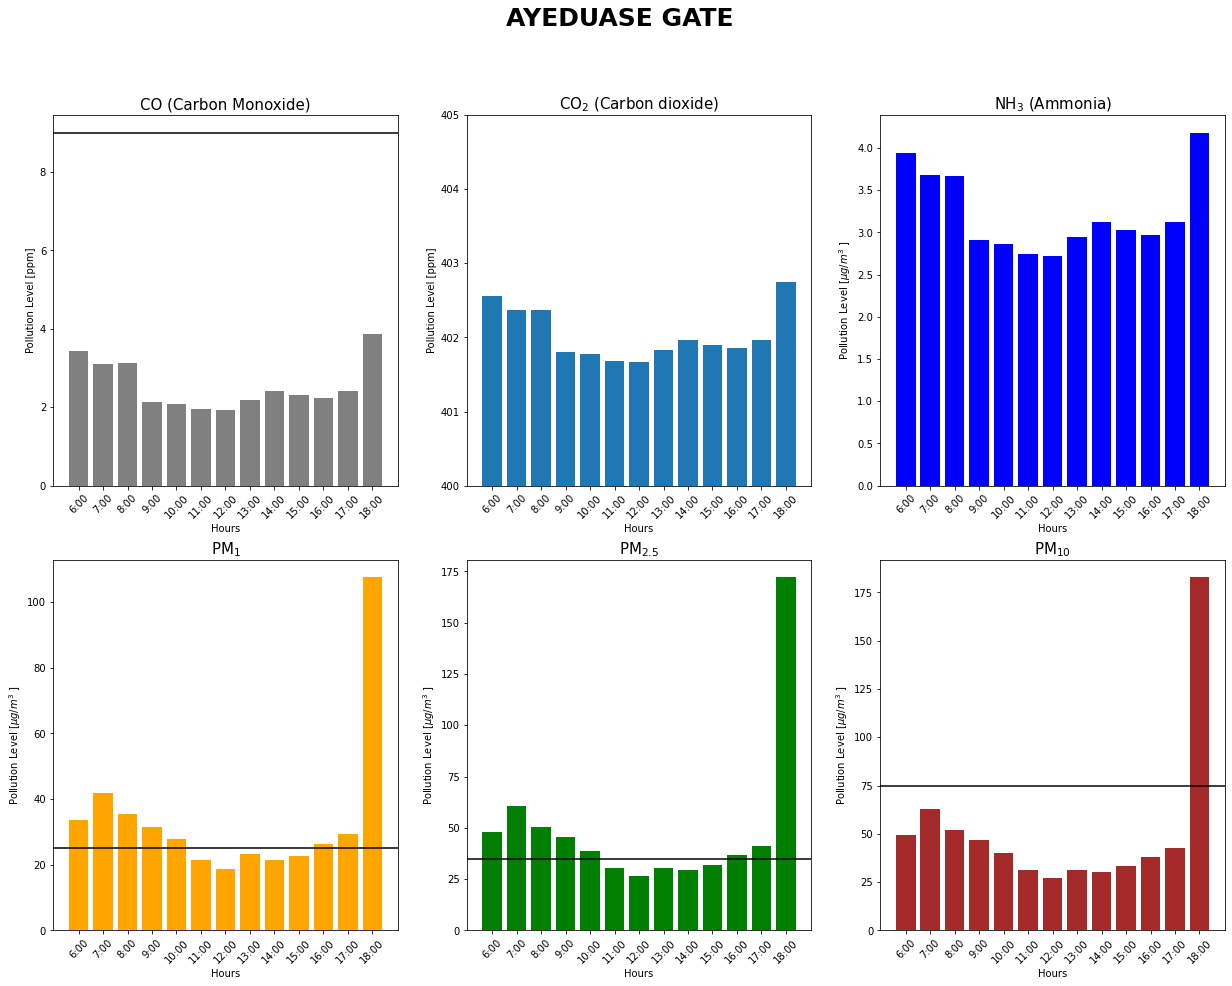

In [15]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(21,15))
plt.suptitle('AYEDUASE GATE', fontsize = 25, fontweight = 'bold')

# fig, axes= plt.subplots(ncols=3, nrows=2)

#columns=list(desmond.columns)

axes[0,0].bar(A_gate.Hourss,A_gate.CO, color='gray')
axes[0,0].set_xlabel('Hours')
axes[0,0].set_ylabel('Pollution Level [ppm]')
axes[0,0].set_xticks(A_gate.Hourss)
axes[0,0].tick_params(axis='x', labelrotation = 45)
axes[0,0].set_title("CO (Carbon Monoxide)", fontsize=15)
axes[0,0].threshold = 9

    
axes[0,1].bar(A_gate.Hourss,A_gate['CO$_2$'])
axes[0,1].set_xlabel('Hours')
axes[0,1].set_ylabel('Pollution Level [ppm]')
axes[0,1].set_ylim(400, 405)
axes[0,1].set_xticks(A_gate.Hourss)
axes[0,1].tick_params(axis='x', labelrotation = 45)
axes[0,1].set_title("CO$_2$ (Carbon dioxide)", fontsize=15)
#axes[0,1].threshold = 403


axes[0,2].bar(A_gate.Hourss,A_gate['NH$_3$'], color='blue')
axes[0,2].set_xlabel('Hours')
axes[0,2].set_ylabel('Pollution Level [$\mu g/m^3$ ]')
axes[0,2].set_xticks(A_gate.Hourss)
axes[0,2].tick_params(axis='x', labelrotation = 45)
axes[0,2].set_title("NH$_3$ (Ammonia)", fontsize=15)
#axes[0,2].threshold = 3



axes[1,0].bar(A_gate.Hourss,A_gate['PM$_{1}$'],color='orange')
axes[1,0].set_xlabel('Hours')
axes[1,0].set_ylabel('Pollution Level [$\mu g/m^3$ ]')
axes[1,0].set_xticks(A_gate.Hourss)
axes[1,0].tick_params(axis='x', labelrotation = 45)
axes[1,0].set_title("PM$_{1}$", fontsize=15)
axes[1,0].threshold =25

axes[1,1].bar(A_gate.Hourss,A_gate['PM$_{2.5}$'], color='green')
axes[1,1].set_xlabel('Hours')
axes[1,1].set_ylabel('Pollution Level [$\mu g/m^3$ ]')
axes[1,1].set_xticks(A_gate.Hourss)
axes[1,1].tick_params(axis='x', labelrotation = 45)
axes[1,1].set_title("PM$_{2.5}$", fontsize=15)
axes[1,1].threshold = 10

axes[1,2].bar(A_gate.Hourss,A_gate['PM$_{10}$'], color='brown')
axes[1,2].set_xlabel('Hours')
axes[1,2].set_ylabel('Pollution Level [$\mu g/m^3$ ]')
axes[1,2].set_xticks(A_gate.Hourss)
axes[1,2].tick_params(axis='x', labelrotation = 45)
axes[1,2].set_title("PM$_{10}$ ", fontsize=15)
axes[1,2].threshold =75

axes[0,0].axhline(y=9, color='black')
#axes[0,1].axhline(y=1000, color='black')
#axes[0,2].axhline(y=25, color='black')
axes[1,0].axhline(y=25, color='black')
axes[1,1].axhline(y=35, color='black')
axes[1,2].axhline(y=75, color='black')

plt.savefig("Ayeduase Gate.png")
#fig.tight_layout()  # Helps fit the plots well without overlapping each other
